<a href="https://colab.research.google.com/github/iamniddi/Machine_Learning/blob/main/Clustering/k_means_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


iris = datasets.load_iris()

X = iris.data
y = iris.target
#라이브러리 및 붓꽃 테이터셋 불러오기

In [4]:
iris.data[-5:]
#붓꽃 테이터는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비로 되어있다.

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

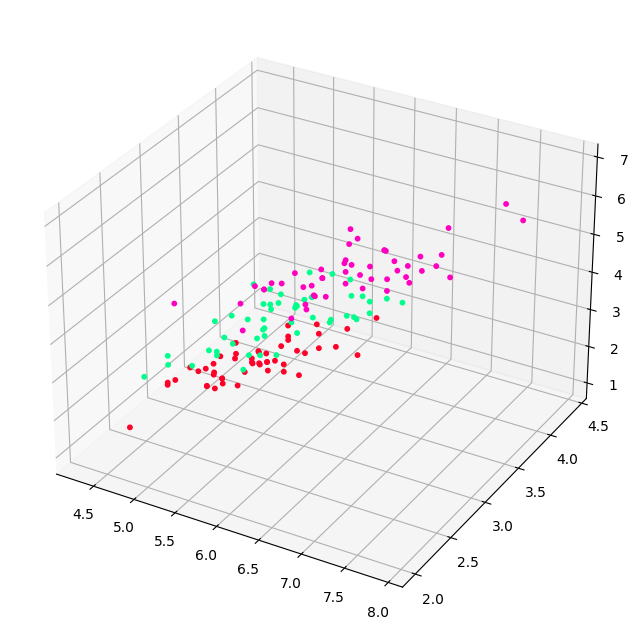

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(  X[:,0] , X[:,1], X[:,2], c = y, s = 10, cmap = "gist_rainbow", alpha = 1)

plt.show()
#데이터의 3d 시각화 방법 일단 3개만 사용했다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

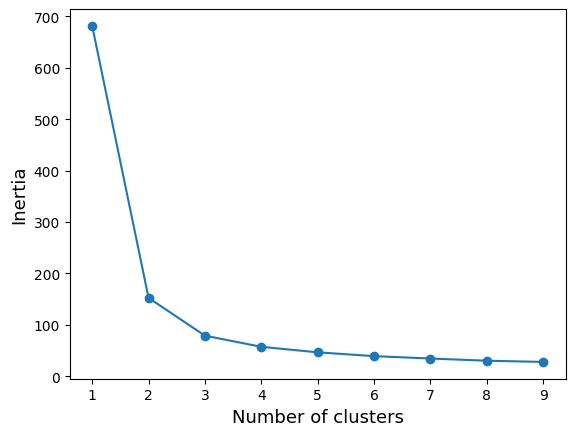

In [6]:
from sklearn.cluster import KMeans

inertia_arr = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters= k, random_state= 21)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertia_arr.append(inertia)

plt.plot(k_range, inertia_arr, marker= 'o')
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()
#kmeans는 클러스터의 갯수를 직접 정해야하는데 이 때 쓰이는 엘보우 기법,
#그래프의 팔꿈치 부분이 가장 최적의 클러스터 갯수로 보면 된다.
#아래 그래프에서는 3이 최적의 값이다. 원본 데이터와 동일

In [30]:
kmeans = KMeans(n_clusters = 3, random_state=21)
kmeans.fit(X)

y_pred = kmeans.labels_
#k-means 사용, 시각화는 3종류의 데이터로 3d 산점도로 표현했으나 실제 학습은 4종류 데이터로 진행

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


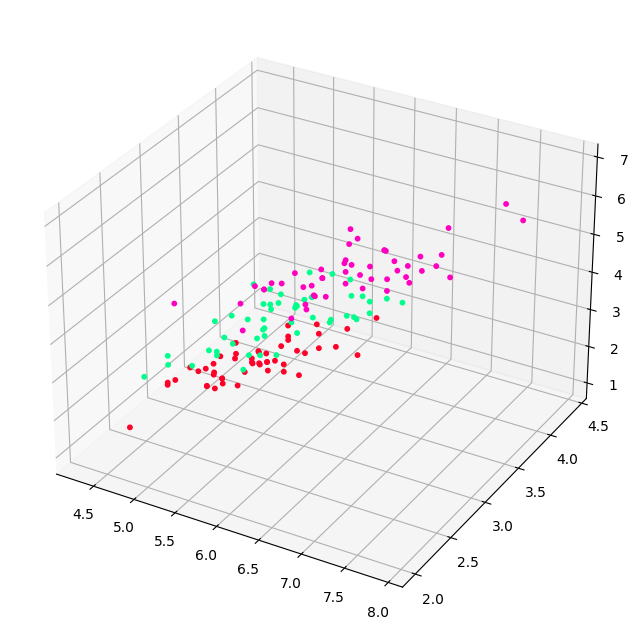

In [20]:

fig = plt.figure(figsize=(8, 8))

ax0 = fig.add_subplot(111, projection='3d')

ax0.scatter(  X[:,0] , X[:,1], X[:,2], c = y, s = 10, cmap = "gist_rainbow", alpha = 1)

plt.show()

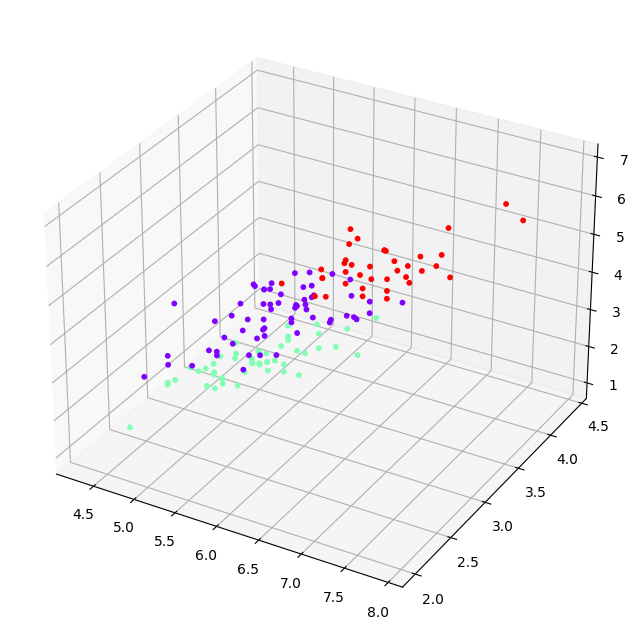

In [21]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(  X[:,0] , X[:,1], X[:,2], c = y_pred, s = 10, cmap = "rainbow", alpha = 1)

plt.show()

In [33]:
for i in range(0, len(y_pred)):
  if y_pred[i] == 1:
    y_pred[i] = 0
  elif y_pred[i] == 0:
    y_pred[i] = 1
#예측 활률 계산을 위한 데이터 변환

In [36]:
count = len(y)
for i in range(0, len(y)):
  if y[i]!= y_pred[i]:
    count = count - 1
print("예측 확률 :",count/len(y))
#예측 확률 값 계산

예측 확률 : 0.8933333333333333
